# Part I - Communicate data findings from loan data at Prosper
## by Gabriel Ntwari

## Introduction

The project will explore the features that are considered while giving loans at Prosper Marketplace Inc. a company that provides loans to borrowers.The dataset used contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.Based on the mentioned variables a loan can be granted or not.



## Preliminary Wrangling


In [1]:
# import all packages and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the dataset
loan_data = pd.read_csv('prosperLoanData.csv')

In [3]:
# printing data shape and othe information
print(loan_data.shape)
print("----------------------------------------------------------------------")
print(loan_data.info())



(113937, 81)
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 

In [4]:
#data description
loan_data.head(3)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.275,0.240,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [5]:
loan_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
# checking duplicated data entries
sum(loan_data.duplicated()) 

0

In [7]:
# checking  null values on each columns
loan_data.isnull().sum()


ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

### Cleanning the dataset 

In [8]:
#Dropping columns with 75 % or more of Missing Values in their content
perctange =75
min_count =  int(((100-perctange)/100)*loan_data.shape[0] + 1)
loan_data = loan_data.dropna( axis=1, thresh=min_count)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 71 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          113937 non-null  object 
 1   ListingNumber                       113937 non-null  int64  
 2   ListingCreationDate                 113937 non-null  object 
 3   CreditGrade                         28953 non-null   object 
 4   Term                                113937 non-null  int64  
 5   LoanStatus                          113937 non-null  object 
 6   ClosedDate                          55089 non-null   object 
 7   BorrowerAPR                         113912 non-null  float64
 8   BorrowerRate                        113937 non-null  float64
 9   LenderYield                         113937 non-null  float64
 10  EstimatedEffectiveYield             84853 non-null   float64
 11  EstimatedLoss             

In [9]:
# remove columns and columns withat are not useful in the Dateset
loan_data.drop(['ListingKey', 'ListingNumber', 'CreditGrade', 
                'ClosedDate', 'CurrentlyInGroup', 'DateCreditPulled', 
                'FirstRecordedCreditLine', 'EmploymentStatusDuration',
                'DebtToIncomeRatio','LoanKey'], axis=1, inplace = True)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 61 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingCreationDate                 113937 non-null  object 
 1   Term                                113937 non-null  int64  
 2   LoanStatus                          113937 non-null  object 
 3   BorrowerAPR                         113912 non-null  float64
 4   BorrowerRate                        113937 non-null  float64
 5   LenderYield                         113937 non-null  float64
 6   EstimatedEffectiveYield             84853 non-null   float64
 7   EstimatedLoss                       84853 non-null   float64
 8   EstimatedReturn                     84853 non-null   float64
 9   ProsperRating (numeric)             84853 non-null   float64
 10  ProsperRating (Alpha)               84853 non-null   object 
 11  ProsperScore              

In [10]:
# filter out loans without ProsperScores
loan_data_cleanned= loan_data[loan_data['ProsperScore'].isnull()==False]

loan_data_cleanned['Occupation']=loan_data_cleanned['Occupation'].fillna('Not Mentioned')

In [11]:
loan_data_cleanned.isnull().sum()

ListingCreationDate            0
Term                           0
LoanStatus                     0
BorrowerAPR                    0
BorrowerRate                   0
                              ..
PercentFunded                  0
Recommendations                0
InvestmentFromFriendsCount     0
InvestmentFromFriendsAmount    0
Investors                      0
Length: 61, dtype: int64

In [12]:
#converting date into datetime
loan_data_cleanned['ListingCreationDate']=pd.to_datetime(loan_data_cleanned['ListingCreationDate'])

In [13]:
loan_data_cleanned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 61 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ListingCreationDate                 84853 non-null  datetime64[ns]
 1   Term                                84853 non-null  int64         
 2   LoanStatus                          84853 non-null  object        
 3   BorrowerAPR                         84853 non-null  float64       
 4   BorrowerRate                        84853 non-null  float64       
 5   LenderYield                         84853 non-null  float64       
 6   EstimatedEffectiveYield             84853 non-null  float64       
 7   EstimatedLoss                       84853 non-null  float64       
 8   EstimatedReturn                     84853 non-null  float64       
 9   ProsperRating (numeric)             84853 non-null  float64       
 10  ProsperRating (Alpha)

### What is the structure of your dataset?

> There was total of 113937 loans data saved in the dataset and 81 features. After cleanning the dataset, there are 84853 observations and 61 features remaining where the features contain information regarding the loans given.

### What is/are the main feature(s) of interest in your dataset?

> The Borrower's Annual Percentage Rate (APR) for the loan, Listing Category, occupation,Employment Status,Prosper Score and Rating,and income Range.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The Prosper Rating and score can affect Borrower's APR because the higher rating  the lower the risk. With low risks there are posibility of getting bigger loans. Creditscore and income Range could also have similar effect on Borrower's APR as Prosper Rating.

## Univariate Exploration



##### 1. How is Prosper Score is distributed in the data?

Prosper Score Count
4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64
********************************************************************************


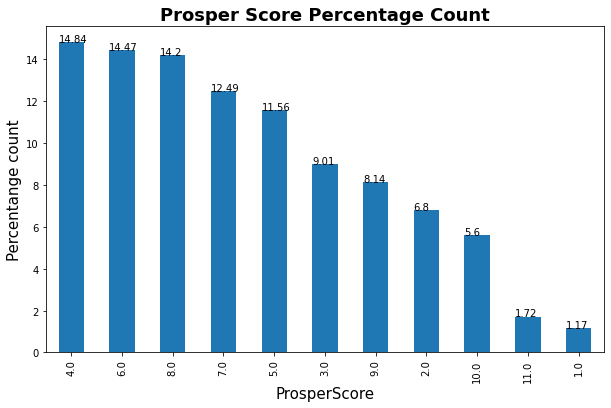

In [14]:

# get score counts 
ProsperScore_distribution=loan_data_cleanned['ProsperScore'].value_counts()
print('Prosper Score Count')
print(ProsperScore_distribution)
print(40*('**'))

#Setting figure size
plt.figure(figsize=[10, 6])

#plotting percentage count
ax=(ProsperScore_distribution/len(loan_data_cleanned)*100).plot(kind='bar')

"""
The following loop will annote for each graph
"""
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x(), p.get_height()))
    
'''
The following codes will label the plot
'''
plt.title('Prosper Score Percentage Count',fontsize=18,fontweight="bold")
plt.ylabel('Percentange count',fontsize=15)
plt.xlabel('ProsperScore',fontsize=15)
plt.show()




From the plot, Most people has score given is 4.0 with around 14.8% of all the people score, it is followed by 6.0 with 14.47% of all given scores and then 8.0 with around 14.2 of frequency. the last 3 given scores are 10.0,11.0 and 1.0 with 5.6%,1.72% and 1.17% of frquencies respectively.

The score ranges from 1-11, with 11 being the best, or lowest risk score.

##### 2. What is the distribution of Annual Percentage rate from the data?

Top 20 Borrower APR Count
0.35797    3672
0.35643    1644
0.30532     902
0.29510     747
0.35356     721
0.15833     651
0.24246     605
0.24758     601
0.12528     559
0.17359     547
0.15324     547
0.27462     534
0.27285     506
0.13799     489
0.12691     456
0.25781     444
0.26528     430
0.19501     425
0.20462     420
0.23318     416
Name: BorrowerAPR, dtype: int64
********************************************************************************


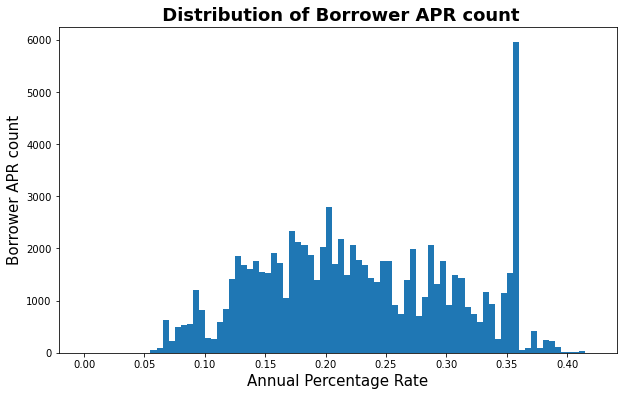

In [15]:

# checking where APR counts(top 20)
print('Top 20 Borrower APR Count')
print(loan_data_cleanned.BorrowerAPR.value_counts().head(20))
print(40*('**'))


"""
plotting APR distribution
"""

plt.figure(figsize=[10, 6]) # figure size
binz= np.arange(0, loan_data_cleanned['BorrowerAPR'].max(), 0.005) # definning bins
ticks=np.arange(0, loan_data_cleanned['BorrowerAPR'].max(), 0.05) # defining xtics
plt.hist(data = loan_data_cleanned, x = 'BorrowerAPR', bins = binz) # plotting histogram

#labes
plt.title(' Distribution of Borrower APR count',fontsize=18,fontweight="bold")
plt.xlabel('Annual Percentage Rate',fontsize=15)
plt.ylabel('Borrower APR count',fontsize=15)
plt.xticks(ticks)
plt.show()

From the following histogram,There is roughly normal distribution in the annual percentage rates  with two outliers with abnormal counts at 0.35797% and at 0.35643%. the APR frequencies tend to increase as the APR rise from around 0.05% up to 0.20% and then the frequencies decline as APR increases toward 0.40%.

##### 3. Which are the top  occupations subjected to taking loans

Top 30 occupations subjected to taking loans
Other                                21317
Professional                         10542
Executive                             3468
Computer Programmer                   3236
Teacher                               2888
Analyst                               2735
Administrative Assistant              2708
Accountant/CPA                        2574
Sales - Commission                    2350
Skilled Labor                         2180
Nurse (RN)                            2159
Clerical                              2116
Sales - Retail                        2029
Retail Management                     2001
Truck Driver                          1366
Not Mentioned                         1333
Construction                          1326
Police Officer/Correction Officer     1277
Laborer                               1217
Civil Service                         1139
Engineer - Mechanical                 1135
Food Service Management               1005
Engineer 

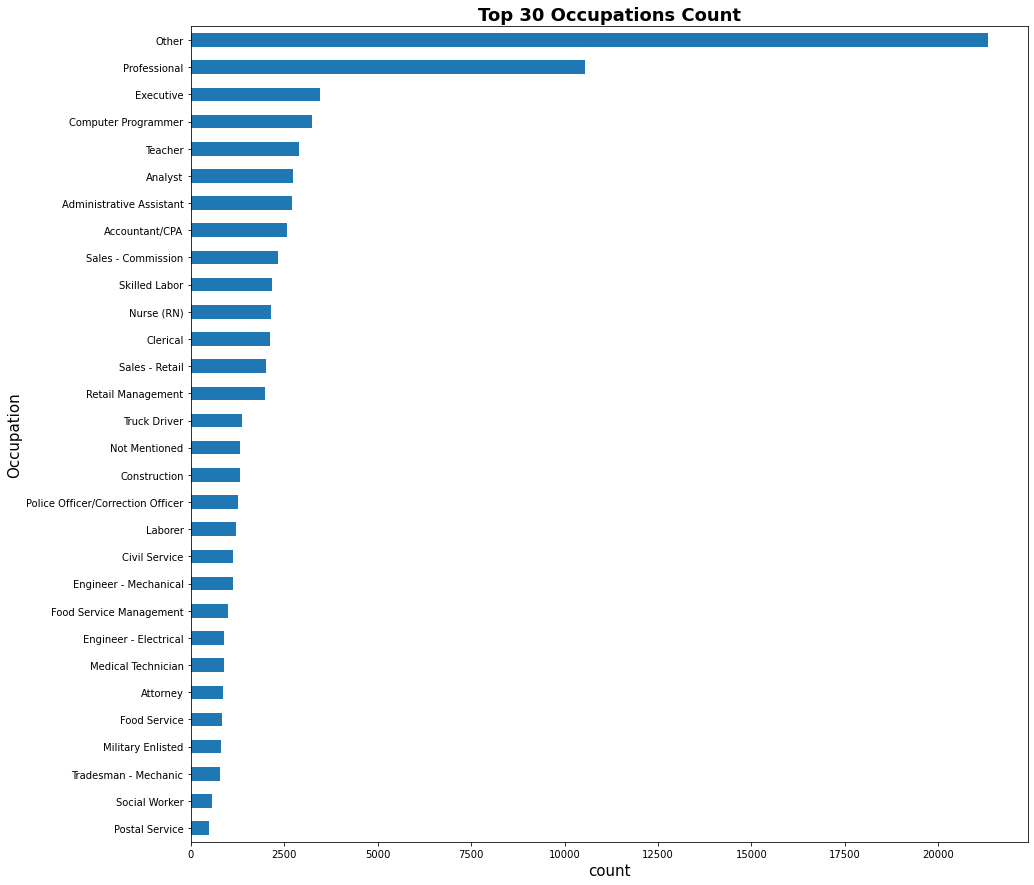

In [16]:

print('Top 30 occupations subjected to taking loans')
print(loan_data_cleanned['Occupation'].value_counts().head(30).sort_values(ascending=False))
print(40*('**'))

# top 30 occupations of borrowers plotting
plt.figure(figsize=[15, 15])
ax=loan_data_cleanned['Occupation'].value_counts().head(30).sort_values().plot(kind='barh')
plt.title('Top 30 Occupations Count',fontsize=18,fontweight="bold")
plt.xlabel('count',fontsize=15)
plt.ylabel('Occupation',fontsize=15)
plt.show()

 The graph shows that many borrowers mentioned __other__ and __Professional__ as their jobs. with known jobs, __Exectives__ are the most people who seek for loans, followed by __Programmers__ and then __Teachers__ followed by __Analysts__ and the then __Administrative assistants__. other occupations such as __Accountants,Skilled Labors,Nurses__ are also present in top 10. __Drivers__,__engineers__ and __Attorney__ are also present in top 30.

#### 4. Does the income considered in loan guaranteeing?

Income Range distribution
$50,000-74,999    25627
$25,000-49,999    24175
$100,000+         15205
$75,000-99,999    14498
$1-24,999          4654
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64
********************************************************************************


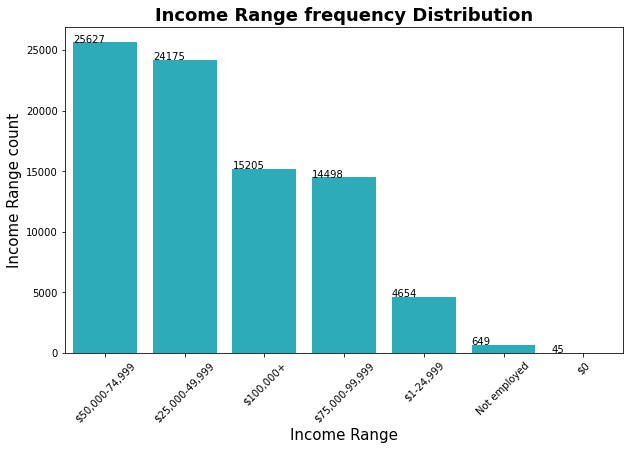

In [17]:
print("Income Range distribution")
print(loan_data_cleanned['IncomeRange'].value_counts())
print(40*('**'))
plt.figure(figsize=[10, 6])
ax=sns.countplot(data = loan_data_cleanned, x = 'IncomeRange', color = sns.color_palette()[9])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x(), p.get_height()))
    
plt.title('Income Range frequency Distribution',fontsize=18,fontweight="bold")
plt.ylabel('Income Range count',fontsize=15)
plt.xlabel('Income Range',fontsize=15)
plt.xticks(rotation=45)
plt.show()

The plot shows that most individual who has a loan has an income range from 40k to 75k are present in dataset, they are followed with ones of 25k to 50k. The unemployed ones and the ones with income of 0k are very few. From the graph it is not clear whether the individuals with more income are likely to get the loans and more investagatiions are required for a better conclusion.  


##### 5. How is Employment Status is distributed in data

Employment Status distribution
Employed         67310
Full-time         7927
Self-employed     4538
Other             3806
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64
********************************************************************************


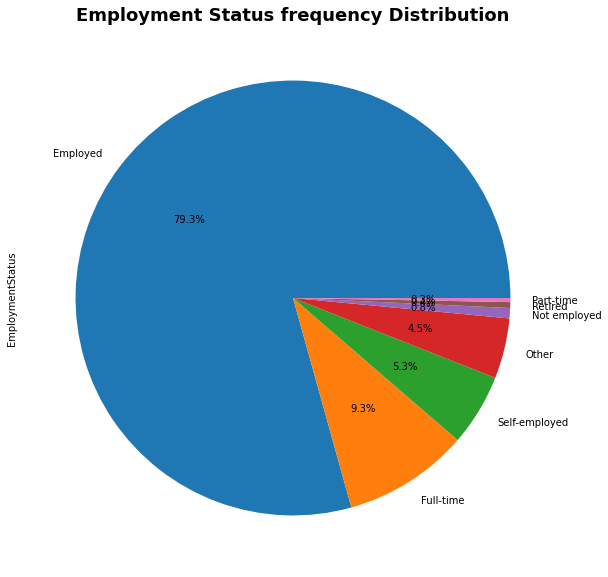

In [18]:
print("Employment Status distribution")
print(loan_data_cleanned['EmploymentStatus'].value_counts())
print(40*('**'))

# plotting
plt.figure(figsize=(10,10))
loan_data_cleanned['EmploymentStatus'].value_counts().plot(kind='pie',autopct='%1.1f%%');

# labels
plt.title('Employment Status frequency Distribution',fontsize=18,fontweight="bold");



The plot shows that it is rare that unemployed and retired individual seek for loans from Prosper. Around 79.3% of loan seekers are employed people,9.3% are full_time, while self-employed people are 5.3%. 


#### 6. What is the loan status of people who has a loan from Prosper?

loan status distribution
Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64
********************************************************************************


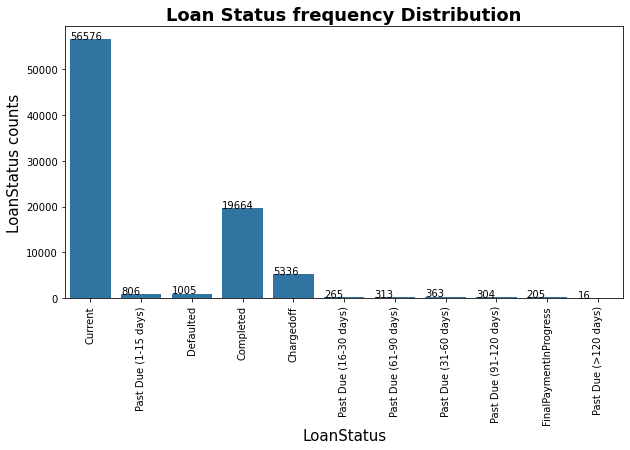

In [19]:
print("loan status distribution")
print(loan_data_cleanned['LoanStatus'].value_counts())
print(40*('**'))

plt.figure(figsize=[10, 5])

ax=sns.countplot(data = loan_data_cleanned, x = 'LoanStatus', color = sns.color_palette()[0])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x(), p.get_height()))
    
plt.title('Loan Status frequency Distribution',fontsize=18,fontweight="bold");
plt.ylabel('LoanStatus counts',fontsize=15)
plt.xlabel('LoanStatus',fontsize=15)
plt.xticks(rotation=90)
plt.show()




The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

The plot shows that more than 50,000 individuals has a loan with Prosper, while around 20,000 have completed thier loans. Around 5,000 people are in chargedoff status.

##### 7. How is Prosper ratings of individuals  is distributed in the data?

ProsperRating (Alpha) distribution
C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64
********************************************************************************


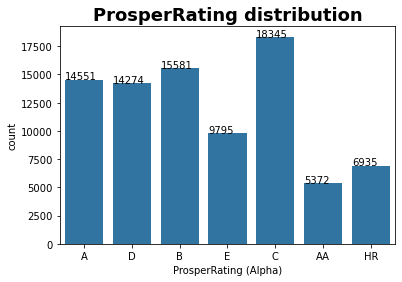

In [20]:
print("ProsperRating (Alpha) distribution")
print(loan_data_cleanned['ProsperRating (Alpha)'].value_counts())
print(40*('**'))

ax=sns.countplot(data = loan_data_cleanned, x = 'ProsperRating (Alpha)', color = sns.color_palette()[0])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x(), p.get_height()))
plt.title('ProsperRating distribution',fontsize=18,fontweight="bold")
plt.show()
    

The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
From the plot, Majority of people are in group C, followed by group B and then group A. Group AA has the least people in data.

#### 8.  What is AvailableBankcardCredit distribution 

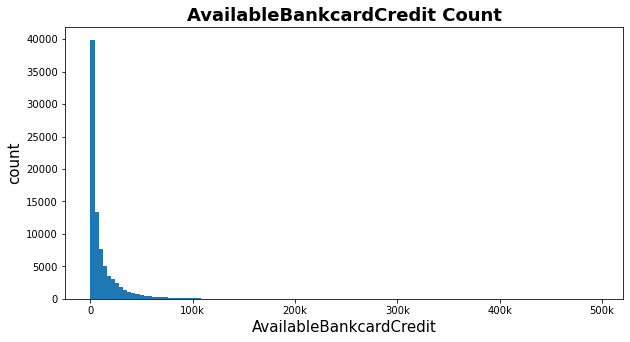

In [21]:
#Check for counts for AvailableBankcardCredit

plt.figure(figsize=[10, 5])
bins = np.arange(0, 498374, 4000)
plt.hist(data = loan_data_cleanned, x = 'AvailableBankcardCredit', bins = bins)
plt.xticks([0, 1e5, 2e5, 3e5, 4e5, 5e5], [0, '100k', '200k', '300k', '400k', '500k'])
plt.title('AvailableBankcardCredit Count',fontsize=18,fontweight="bold")
plt.xlabel('AvailableBankcardCredit',fontsize=15)
plt.ylabel('count',fontsize=15);

Most AvailableBankcardCredit counts fall in values from 0 to 100k and the majority are at 0. Clearly there are few percent of people who have higher bank total credits than 100k

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From Prosper score,most people has score given is 4.0 with around 14.8% of all the people, it is followed by 6.0 with 14.47% of all given scores and then 8.0 with around 14.2 of frequency. the last 3 given scores are 10.0,11.0 and 1.0 with 5.6%,1.72% and 1.17% of frquencies respectively.
There is roughly normal distribution in the annual percentage rates  with two outliers with abnormal counts at 0.35797% and at 0.35643%. 
Many borrowers mentioned other and Professional as their jobs. with known jobs, Exectives are the most people who seek for loans, followed by Programmers and then Teachers followed by Analysts and the then Administrative assistants.Most individual who has a loan has an income range from 40k to 75k are present in dataset, they are followed with ones of 25k to 50k. The unemployed ones and the ones with income of 0k are very few. 
There are more than 50,000 individuals has a loan with Prosper, while around 20,000 have completed thier loans. Around 5,000 people are in chargedoff status. Around 79.3% ofloan seekers are employed people,9.3% are full_time, while self-employed people are 5.3%. Most AvailableBankcardCredit counts fall in values from 0 to 100k and the majority are at 0. 



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There is no unusual distributions in my datasets apart from suprising findings, some operation have been made like  replacing NaN values and selecting only dataset with known Prosper Score.

## Bivariate Exploration


#### 9. What is the relationship between ProsperRating (Alpha) and BorrowerAPR

ProsperRating (Alpha)
A     0.138909
AA    0.090041
B     0.184030
C     0.226124
D     0.280581
E     0.330551
HR    0.356061
Name: BorrowerAPR, dtype: float64
********************************************************************************


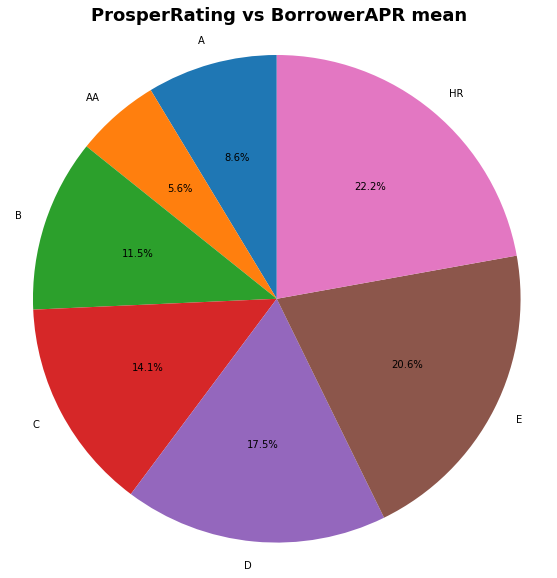

In [22]:
ProsperRating_mean = loan_data_cleanned.groupby('ProsperRating (Alpha)')['BorrowerAPR'].mean()
print(ProsperRating_mean)
print(40*('**'))

plt.figure(figsize=(10,10))
plt.pie(ProsperRating_mean, labels = ProsperRating_mean.index, startangle = 90,
     autopct='%1.1f%%')
plt.axis('square') 
plt.title('ProsperRating vs BorrowerAPR mean',fontsize=18,fontweight="bold");

Borrowers Rating are displayed in order from highest rating to lowest rating (A, AA, B, C, D, E, HR) in counter_clockwise direction and their mean values are displayed as percentage of the sum of the means. We can see a pattern that the highest rating of AA received lowest APR (5.6%), whereas the lowerest rating received the highest APR (22.2%). This proves the point that borrowers with higher rating received lower APR..

#### 10 What is the trend of borrower rates over years?

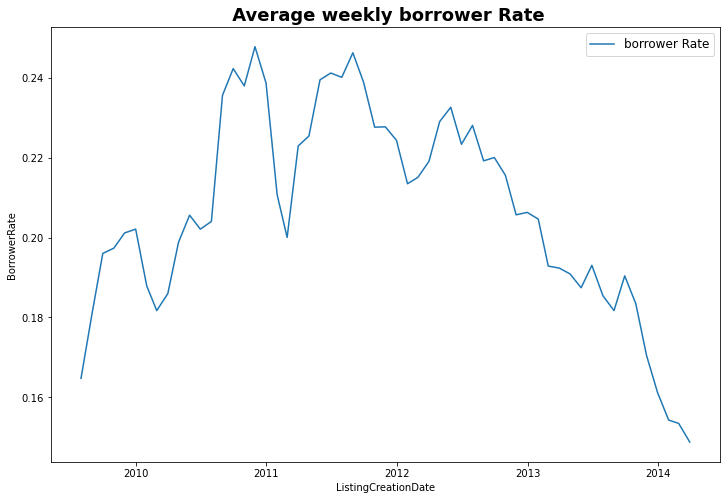

In [23]:
# resampling data at monthly basis
df=loan_data_cleanned.set_index('ListingCreationDate').resample('M').mean()
#ploting
plt.figure(figsize=(12,8))
sns.lineplot(df.index,df['BorrowerRate'])# ploting monthly resampled data
plt.title(' Average weekly borrower Rate',fontsize=18,fontweight="bold") #tilte of plot
plt.legend(labels=["borrower Rate"],fontsize = 'large') # legend of plot
plt.show()# displaying

The average monthly Borrower Rates generally increased from 2009 at 0.162 to 2011 at 0.25,in Mid 2011, there was a sharp fall to 0.20 which recovered at the of the year. from 2012 to 2014, there was a gradual fall in borrower rates from 0.24 to 0.15 

The peak years were 2011 and 2012

#### 11. What is the relationship between ProsperScore and BorrowerAPR

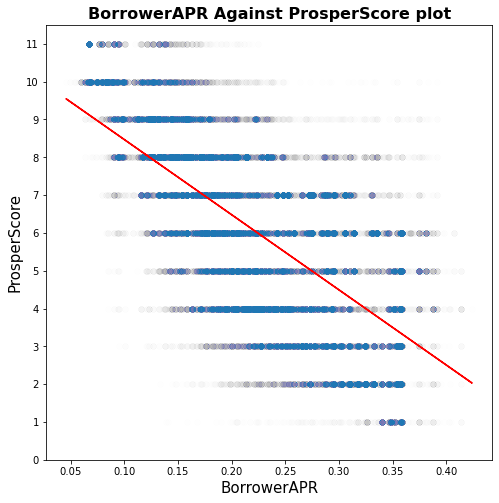

In [24]:
# scatter and heat plot for comparing ProsperScore and BorrowerAPR. 
plt.figure(figsize = [8, 8]) 
plt.scatter(data = loan_data_cleanned, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
a, b = np.polyfit(loan_data_cleanned['BorrowerAPR'], loan_data_cleanned['ProsperScore'], 1)
plt.plot(loan_data_cleanned['BorrowerAPR'], a*loan_data_cleanned['BorrowerAPR']+b,color='r')  
plt.yticks(np.arange(0, 12, 1))
plt.title('BorrowerAPR Against ProsperScore plot',fontsize=16,fontweight="bold")
plt.xlabel('BorrowerAPR',fontsize=15)
plt.ylabel('ProsperScore',fontsize=15)
plt.show()


The plot shows that as the BorrowAPR increases, the ProsperScore reduces,There is a negative correlation between these variables. This make sense becasue people with higher rating tend to be more reliable and therefore given lower BorrowerAPR

#### 12. What is the relationship between EstimatedReturn and BorrowerAPR

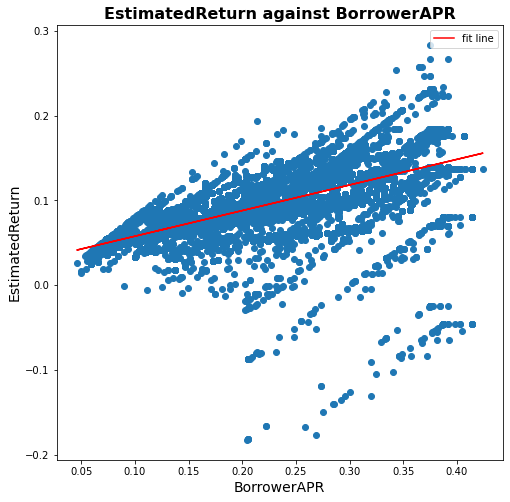

In [25]:
plt.figure(figsize = [8, 8])
a, b = np.polyfit(loan_data_cleanned['BorrowerAPR'], loan_data_cleanned["EstimatedReturn"], 1)
plt.scatter(loan_data_cleanned["BorrowerAPR"],loan_data_cleanned["EstimatedReturn"])
plt.plot(loan_data_cleanned['BorrowerAPR'], a*loan_data_cleanned['BorrowerAPR']+b,color='r',label='fit line') 
plt.legend()
plt.title('EstimatedReturn against BorrowerAPR',fontsize=16,fontweight="bold")
plt.xlabel('BorrowerAPR',fontsize=14,)
plt.ylabel('EstimatedReturn',fontsize=14,)
plt.show()

The graph shows that a positive correlation between BorrowerAPR and EstimatedReturn, generally as the value of BorrowerAPR increases, the EstimatedReturn value is expected to increase as well.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We have seen that the highest rating of AA received lowest APR (5.6), whereas the lowerest rating received the highest APR (22.2).
As the BorrowAPR increases, the ProsperScore reduces,There is a negative correlation between these variables. This make sense becasue people with higher rating tend to be more reliable and therefore given lower BorrowerAPR
There is a positive correlation between BorrowerAPR and EstimatedReturn, generally as the value of BorrowerAPR increases, the EstimatedReturn value is expected to increase as well.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>The average monthly Borrower Rates generally increased from 2009 at 0.162 to 2011 at 0.25,in Mid 2011, from 2012 to 2014, there was a gradual fall in borrower rates from 0.24 to 0.15  and the peak years were 2011 and 2012

## Multivariate Exploration


##### 13. Does being a homeowner affect borrower rate?

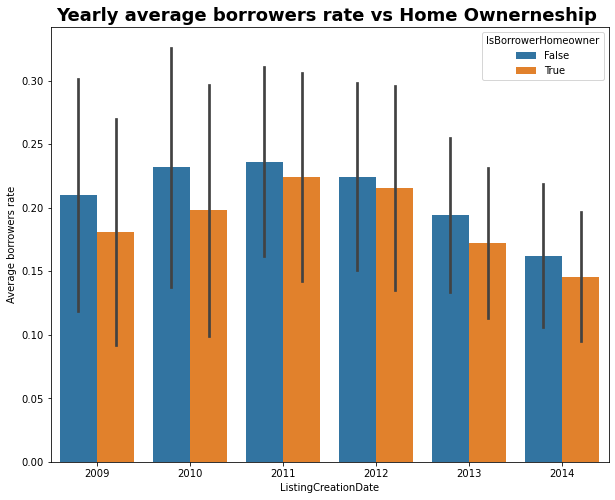

In [26]:
plt.figure(figsize=[10, 8]);
sns.barplot(data = loan_data_cleanned, x = loan_data_cleanned['ListingCreationDate'].apply(lambda x: x.year),
            y = 'BorrowerRate', hue = 'IsBorrowerHomeowner', ci = 'sd');
plt.ylabel('Average borrowers rate');
plt.title('Yearly average borrowers rate vs Home Ownerneship ',fontsize=18,fontweight="bold");
plt.show()



According to the plot, and based on yearly averages, from 2009 to 2014, people with homes are given low rates compared with people without houses.
It does seem like homeowners have a slightly lower rate that non-homeowners.


#### 14.How does the length of time affect Returns?

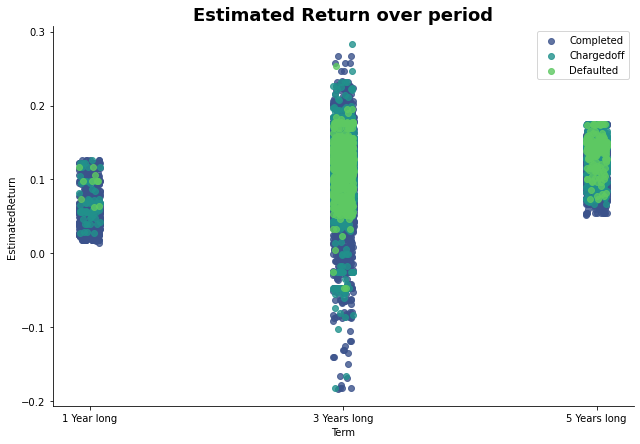

In [27]:
plot = sns.FacetGrid(data = loan_data_cleanned, hue = 'LoanStatus', 
                  hue_order = ['Completed','Chargedoff','Defaulted'], 
                  size = 6, aspect = 1.5, palette="viridis")
plot.map(sns.regplot,"Term", "EstimatedReturn", fit_reg = False, x_jitter=True)
plot.set(xticks=np.arange(12,84,24),xticklabels=["1 Year long", "3 Years long", "5 Years long" ])
plt.legend(loc=1)
plt.title('Estimated Return over period', fontsize=18,fontweight="bold")
plt.show()

For 1 year loans have the lowest history of defaulting with its highest peak is at 0.12 of Estimated Return.
For 3 years loans have the widest range of expected returns, with more extreme rates seeming to have lower defaults historically and with the peak around 0.28 of Estimated return.
For 5 year loans have higher returns on average than 1 year but at a much higher risk of default historically with peak around 0.19 of Estimated return.



#### 15. what are the correlations among variables?

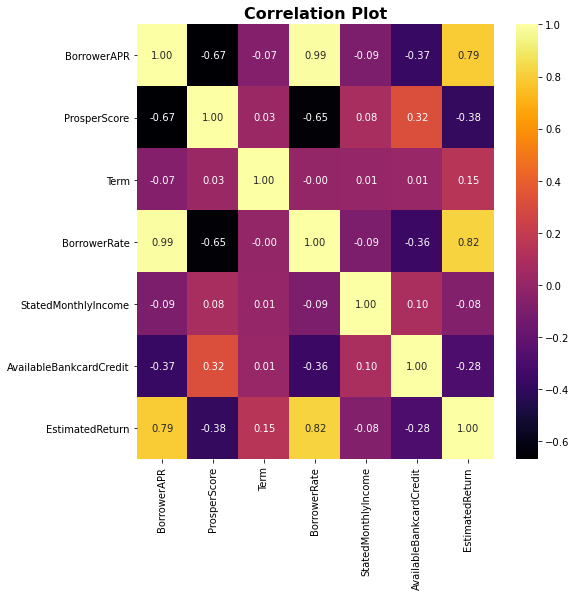

In [28]:
# correlation plot 

columns = ['BorrowerAPR', 'ProsperScore','Term','BorrowerRate',
            'StatedMonthlyIncome', 'AvailableBankcardCredit','EstimatedReturn']

plt.figure(figsize = [8, 8])
sns.heatmap(loan_data_cleanned[columns].corr(), annot = True, fmt = '.2f',
           cmap = 'inferno')
plt.title('Correlation Plot',fontsize=16,fontweight="bold") 
plt.show()

There are two strong positive relationships between BorrowerRate and BorrowerAPR, and between BorrowerAPR and EstimatedReturn, this means the rates and returns are dependent to borrower APR. BorrowerAPR and ProsperScore are negative because borrowers with lower score are more likely to pay higher APR. Similarly, higher CreditScore means the borrowers are more trustworthy, therefore it recevied lower APR.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Based on yearly averages, from 2009 to 2014, people with homes are given low rates compared with people without houses. It does seem like homeowners have a slightly lower rate that non-homeowners.
For 1 year loans have the lowest history of defaulting with its highest peak is at 0.12 of Estimated Return.
For 3 years loans have the widest range of expected returns, with more extreme rates seeming to have lower defaults historically and with the peak around 0.28 of Estimated return.
For 5 year loans have higher returns on average than 1 year but at a much higher risk of default historically with peak around 0.19 of Estimated return.
here are two strong positive relationships between BorrowerRate and BorrowerAPR, and between BorrowerAPR and EstimatedReturn, this means the rates and returns are dependent to borrower APR. BorrowerAPR and ProsperScore are negative because borrowers with lower score are more likely to pay higher APR. Similarly, higher CreditScore means the borrowers are more trustworthy, therefore it recevied lower APR.
 
### Were there any interesting or surprising interactions between features?

> The surprising fact is that the 1 year loans are more likely to be tradedoff than other loans 

## Conclusions
        The project was designed to discover insight from a dataset of loans from on Prosper. At first, it contains 81 variables and 113,937 observations, but some features are less important and contains few information to be analysed. After data cleanning it contains  84853 observations and 61 features.
        Individual variables have been analysed using diferent data visualizations such as pie chart,histograms and bar graphs.From Analyis, it is found that employed individulas of 50,000-74,999 dollars are likely to apply for loans more than others.Professionals,Executives,Computer Programmers,Teachers,Analysts ,Administrative Assistants are top borrowers in Prosper Marketplace Inc.
        For Bivariate analysis, in 2011 and 2012 was the years where rates was very high compared to other years.The highest rating of AA received lowest APR (5.6%), whereas the lowerest rating received the highest APR (22.2%).The people with higher rating tend to be more reliable and therefore given lower BorrowerAPR.
        In multivariate exploration, it's observed that within each income range group, the rate increases as the term increases, but for the same term, people with houses(house owners) are able to be granted a lower interest rate.A lthough ProsperScore has a negative correlation with rates, whether the borrowers are homeowners still proves to decide whether they can get a lower interest rate, i.e., a homeowner who has the same score as a non-homeowner can enjoy lower rates. Also, interest rates decrease as income ranges increase, despite different LoanStatus
        
 ### Limitations
         Almost data from 2016 to 2019 was not analysed since they have not ProsperScores this a huge data that could affect decision making.
         Some columns contains lots of Null values which I dropped to get a clean dataset.
         Machine Learning models such as PCA are needed to reduce number of features.
         
         

